In [1]:
import warnings, datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
df = pd.read_csv('2016.csv', low_memory=False)

In [3]:
#coordinate = pd.read_csv("airports.csv")
coordinate = pd.read_pickle("coordinate_interpolate.pkl")
coordinate

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,WEATHER,WEATHER_INTERPOLATE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp ...
...,...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prc...
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp ...


In [4]:
df['DATE']=pd.to_datetime(df['FL_DATE'])

In [5]:
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#__________________________________________________ ___________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
    #_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [6]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,5.617658e+06,5.617658e+06,5.554202e+06,5.554202e+06,5.552240e+06,5.552240e+06,5.549814e+06,5.549814e+06,5.617658e+06,5.549814e+06,5.538145e+06,5.617658e+06,5.617658e+06,5.617652e+06,5.538145e+06,5.538145e+06,5.617658e+06,964239.000000,964239.000000,964239.000000,964239.000000,964239.000000,0.0
mean,2.078520e+03,1.331004e+03,1.333640e+03,8.938011e+00,1.619105e+01,1.355112e+03,1.467264e+03,7.454353e+00,1.490819e+03,1.471570e+03,3.519290e+00,1.172392e-02,2.430194e-03,1.453971e+02,1.401608e+02,1.165268e+02,8.500786e+02,20.257775,2.702736,14.696167,0.084963,24.328406,NaN
std,1.700417e+03,4.895842e+02,5.025129e+02,3.976306e+01,8.827188e+00,5.043022e+02,5.302217e+02,5.700441e+00,5.162847e+02,5.346746e+02,4.187332e+01,1.076405e-01,4.923707e-02,7.642798e+01,7.566283e+01,7.352773e+01,6.195001e+02,57.341275,21.394475,30.584197,2.419614,45.963177,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.040000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.520000e+02,0.000000e+00,0.000000e+00,5.000000e+00,1.400000e+01,4.000000e+00,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,7.110000e+02,9.150000e+02,9.170000e+02,-5.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.105000e+03,1.052000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,8.800000e+01,8.400000e+01,6.200000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.639000e+03,1.325000e+03,1.328000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.507000e+03,6.000000e+00,1.520000e+03,1.511000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02,1.210000e+02,9.700000e+01,6.780000e+02,1.000000,0.000000,2.000000,0.000000,2.000000,NaN
75%,2.855000e+03,1.735000e+03,1.742000e+03,6.000000e+00,1.900000e+01,1.756000e+03,1.914000e+03,9.000000e+00,1.920000e+03,1.918000e+03,6.000000e+00,0.000000e+00,0.000000e+00,1.780000e+02,1.730000e+02,1.480000e+02,1.091000e+03,18.000000,0.000000,19.000000,0.000000,30.000000,NaN
max,8.402000e+03,2.359000e+03,2.400000e+03,2.149000e+03,1.860000e+02,2.400000e+03,2.400000e+03,2.500000e+02,2.400000e+03,2.400000e+03,2.142000e+03,1.000000e+00,1.000000e+00,7.050000e+02,7.780000e+02,7.230000e+02,4.983000e+03,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,NaN


In [7]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DATE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,625.0,949.0,11.0,1005,1000.0,-5.0,0.0,NaN,0.0,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,2238.0,40.0,9.0,2342,49.0,67.0,0.0,NaN,0.0,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN,2016-12-31
5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,715.0,1031.0,4.0,1052,1035.0,-17.0,0.0,NaN,0.0,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31


In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#pd.concat([total, percent], axis=1, keys=['Total', 'Percent']


In [9]:
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Unnamed: 27,5617658,1.000000
CANCELLATION_CODE,5551797,0.988276
LATE_AIRCRAFT_DELAY,4653419,0.828356
SECURITY_DELAY,4653419,0.828356
NAS_DELAY,4653419,0.828356
CARRIER_DELAY,4653419,0.828356
WEATHER_DELAY,4653419,0.828356
ARR_DELAY,79513,0.014154
AIR_TIME,79513,0.014154
ACTUAL_ELAPSED_TIME,79513,0.014154


In [10]:
df = df.loc[df["ORIGIN"].isin(coordinate['IATA_CODE']) | df["DEST"].isin(coordinate['IATA_CODE'])]
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DATE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,625.0,949.0,11.0,1005,1000.0,-5.0,0.0,NaN,0.0,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,2238.0,40.0,9.0,2342,49.0,67.0,0.0,NaN,0.0,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN,2016-12-31
5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,715.0,1031.0,4.0,1052,1035.0,-17.0,0.0,NaN,0.0,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31


In [11]:
#处理缺失值
df2=df.loc[:,['DATE','ORIGIN','DEST','CRS_DEP_TIME','WHEELS_OFF','WHEELS_ON','CRS_ARR_TIME','DEP_TIME','ARR_TIME','DISTANCE','DEP_DELAY','ARR_DELAY']]


In [11]:
df2

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY
0,2016-01-01,DTW,LAX,1935,1958.0,2107.0,2144,1935.0,2120.0,1979.0,0.0,-24.0
1,2016-01-01,ATL,GRR,2125,2143.0,2315.0,2321,2130.0,2319.0,640.0,5.0,-2.0
2,2016-01-01,LAX,ATL,2255,2315.0,542.0,600,2256.0,547.0,1947.0,1.0,-13.0
3,2016-01-01,SLC,ATL,1656,1712.0,2205.0,2229,1700.0,2213.0,1590.0,4.0,-16.0
4,2016-01-01,BZN,MSP,900,1115.0,1416.0,1216,1012.0,1420.0,874.0,72.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016-12-31,IAH,BWI,615,625.0,949.0,1005,613.0,1000.0,1235.0,-2.0,-5.0
5617654,2016-12-31,BWI,IAH,2108,2238.0,40.0,2342,2229.0,49.0,1235.0,81.0,67.0
5617655,2016-12-31,ORD,RSW,700,715.0,1031.0,1052,704.0,1035.0,1120.0,4.0,-17.0
5617656,2016-12-31,RSW,ORD,1704,1720.0,1854.0,1907,1711.0,1901.0,1120.0,7.0,-6.0


In [13]:
df2.isnull()
df2.info()
#df2.dropna(axis=1, inplace=True)
df2=df2.dropna()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5617658 entries, 0 to 5617657
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   DATE          datetime64[ns]
 1   ORIGIN        object        
 2   DEST          object        
 3   CRS_DEP_TIME  int64         
 4   WHEELS_OFF    float64       
 5   WHEELS_ON     float64       
 6   CRS_ARR_TIME  int64         
 7   DEP_TIME      float64       
 8   ARR_TIME      float64       
 9   DISTANCE      float64       
 10  DEP_DELAY     float64       
 11  ARR_DELAY     float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 557.2+ MB


In [14]:
total = df2.isnull().sum().sort_values(ascending=False)
percent=(df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
DATE,0,0.0
ORIGIN,0,0.0
DEST,0,0.0
CRS_DEP_TIME,0,0.0
WHEELS_OFF,0,0.0
WHEELS_ON,0,0.0
CRS_ARR_TIME,0,0.0
DEP_TIME,0,0.0
ARR_TIME,0,0.0
DISTANCE,0,0.0


In [15]:
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
DATE,0,0.0
ORIGIN,0,0.0
DEST,0,0.0
CRS_DEP_TIME,0,0.0
WHEELS_OFF,0,0.0
WHEELS_ON,0,0.0
CRS_ARR_TIME,0,0.0
DEP_TIME,0,0.0
ARR_TIME,0,0.0
DISTANCE,0,0.0


In [16]:
df2.isnull().sum()

DATE            0
ORIGIN          0
DEST            0
CRS_DEP_TIME    0
WHEELS_OFF      0
WHEELS_ON       0
CRS_ARR_TIME    0
DEP_TIME        0
ARR_TIME        0
DISTANCE        0
DEP_DELAY       0
ARR_DELAY       0
dtype: int64

In [17]:
df=df2
df = df.reset_index(drop=True)

In [18]:
df

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY
0,2016-01-01,DTW,LAX,1935,1958.0,2107.0,2144,1935.0,2120.0,1979.0,0.0,-24.0
1,2016-01-01,ATL,GRR,2125,2143.0,2315.0,2321,2130.0,2319.0,640.0,5.0,-2.0
2,2016-01-01,LAX,ATL,2255,2315.0,542.0,600,2256.0,547.0,1947.0,1.0,-13.0
3,2016-01-01,SLC,ATL,1656,1712.0,2205.0,2229,1700.0,2213.0,1590.0,4.0,-16.0
4,2016-01-01,BZN,MSP,900,1115.0,1416.0,1216,1012.0,1420.0,874.0,72.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5538140,2016-12-31,IAH,BWI,615,625.0,949.0,1005,613.0,1000.0,1235.0,-2.0,-5.0
5538141,2016-12-31,BWI,IAH,2108,2238.0,40.0,2342,2229.0,49.0,1235.0,81.0,67.0
5538142,2016-12-31,ORD,RSW,700,715.0,1031.0,1052,704.0,1035.0,1120.0,4.0,-17.0
5538143,2016-12-31,RSW,ORD,1704,1720.0,1854.0,1907,1711.0,1901.0,1120.0,7.0,-6.0


In [19]:
df1=df.loc[df['DATE']>=pd.to_datetime('20160101')]
df1=df1.loc[df1['DATE']<pd.to_datetime('20160102')]
df1['CRS_DEP_TIME'] = create_flight_time(df1,'CRS_DEP_TIME')
df1['WHEELS_OFF'] = create_flight_time(df1,'WHEELS_OFF')
df1['WHEELS_ON'] = create_flight_time(df1,'WHEELS_ON')
df1['CRS_ARR_TIME'] = create_flight_time(df1,'CRS_ARR_TIME')
df1['DEP_TIME'] = create_flight_time(df1,'DEP_TIME')
df1['ARR_TIME'] = create_flight_time(df1,'ARR_TIME')

In [20]:
df1

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY
0,2016-01-01,DTW,LAX,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0
1,2016-01-01,ATL,GRR,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0
2,2016-01-01,LAX,ATL,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0
3,2016-01-01,SLC,ATL,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0
4,2016-01-01,BZN,MSP,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12949,2016-01-01,DFW,ATL,2016-01-01 09:45:00,2016-01-01 10:04:00,2016-01-01 12:29:00,2016-01-01 12:41:00,2016-01-01 09:53:00,2016-01-01 12:34:00,731.0,8.0,-7.0
12950,2016-01-01,ATL,GSP,2016-01-01 14:10:00,2016-01-01 14:23:00,2016-01-01 14:51:00,2016-01-01 15:02:00,2016-01-01 14:08:00,2016-01-01 14:55:00,153.0,-2.0,-7.0
12951,2016-01-01,GSP,ATL,2016-01-01 15:45:00,2016-01-01 15:55:00,2016-01-01 16:28:00,2016-01-01 16:46:00,2016-01-01 15:42:00,2016-01-01 16:36:00,153.0,-3.0,-10.0
12952,2016-01-01,MSP,PIT,2016-01-01 19:48:00,2016-01-01 19:57:00,2016-01-01 22:28:00,2016-01-01 22:49:00,2016-01-01 19:44:00,2016-01-01 22:34:00,726.0,-4.0,-15.0


In [21]:
df1['CRS_DEP_TIME'][12953]

Timestamp('2016-01-01 14:55:00')

In [22]:
df1 = df1.reset_index(drop=True)
df1

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY
0,2016-01-01,DTW,LAX,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0
1,2016-01-01,ATL,GRR,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0
2,2016-01-01,LAX,ATL,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0
3,2016-01-01,SLC,ATL,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0
4,2016-01-01,BZN,MSP,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12949,2016-01-01,DFW,ATL,2016-01-01 09:45:00,2016-01-01 10:04:00,2016-01-01 12:29:00,2016-01-01 12:41:00,2016-01-01 09:53:00,2016-01-01 12:34:00,731.0,8.0,-7.0
12950,2016-01-01,ATL,GSP,2016-01-01 14:10:00,2016-01-01 14:23:00,2016-01-01 14:51:00,2016-01-01 15:02:00,2016-01-01 14:08:00,2016-01-01 14:55:00,153.0,-2.0,-7.0
12951,2016-01-01,GSP,ATL,2016-01-01 15:45:00,2016-01-01 15:55:00,2016-01-01 16:28:00,2016-01-01 16:46:00,2016-01-01 15:42:00,2016-01-01 16:36:00,153.0,-3.0,-10.0
12952,2016-01-01,MSP,PIT,2016-01-01 19:48:00,2016-01-01 19:57:00,2016-01-01 22:28:00,2016-01-01 22:49:00,2016-01-01 19:44:00,2016-01-01 22:34:00,726.0,-4.0,-15.0


In [23]:
df1.shape[0]

12954

In [24]:
df1['ORIGIN'][1255]

'DFW'

In [32]:
for i in range(df1.shape[0]):
    df1['ORIGIN'][i]=list(coordinate['IATA_CODE']).index(df1['ORIGIN'][i])
    df1['DEST'][i]=list(coordinate['IATA_CODE']).index(df1['DEST'][i])

In [124]:
from datetime import datetime, timedelta

# 四舍五入到最近的整点
def rounder(t):
    if t.minute >= 30:
        # 增加一个小时
        return (t + timedelta(hours=1)).replace(second=0, microsecond=0, minute=0)
    else:
        return t.replace(second=0, microsecond=0, minute=0)


# 定义一个函数，根据输入的时间以及机场天气数据查询天气数据，并返回temp,prcp,wspd
def query_weather(time,weather):
    # 将时间四舍五入到最近的整点
    time = rounder(time)
    try:
        row = weather.loc[time]
        # 返回temp,prcp,wspd
        return row['temp'], row['prcp'], row['wspd']
    except KeyError:
        # 如果找不到对应的行，说明没有天气记录
        # print('没有天气记录')
        return None, None, None

# 测试函数
time0 = datetime(2015, 1, 1, 23,35)
temp, prcp, wspd = query_weather(time0,coordinate['WEATHER_INTERPOLATE'][0])
print(temp, prcp, wspd)

None None None


In [51]:
df1['O_LONGITUDE'] = 0.0
df1['O_LATITUDE']=0.0
df1['D_LONGITUDE'] = 0.0
df1['D_LATITUDE']=0.0
df1['O_WEATHER'] = pd.Series(dtype='object',index=range(len(df1)))
df1['D_WEATHER'] = pd.Series(dtype='object',index=range(len(df1)))
df1['O_TEMP']=0.0
df1['O_PRCP']=0.0
df1['O_WSPD']=0.0
df1['D_TEMP']=0.0
df1['D_PRCP']=0.0
df1['D_WSPD']=0.0

#df1['O_WEATHER']=coordinate['WEATHER_INTERPOLATE'][0]
#df1['D_WEATHER']=coordinate['WEATHER_INTERPOLATE'][0]

In [52]:
test1=df1.iloc[7]

In [53]:
test1

DATE            2016-01-01 00:00:00
ORIGIN                           20
DEST                            165
CRS_DEP_TIME    2016-01-01 09:45:00
WHEELS_OFF      2016-01-01 10:05:00
WHEELS_ON       2016-01-01 10:50:00
CRS_ARR_TIME    2016-01-01 10:50:00
DEP_TIME        2016-01-01 09:46:00
ARR_TIME        2016-01-01 10:53:00
DISTANCE                      270.0
DEP_DELAY                       1.0
ARR_DELAY                       3.0
O_LONGITUDE                     0.0
O_LATITUDE                      0.0
D_LONGITUDE                     0.0
D_LATITUDE                      0.0
O_WEATHER                       NaN
D_WEATHER                       NaN
O_TEMP                          0.0
O_PRCP                          0.0
O_WSPD                          0.0
D_TEMP                          0.0
D_PRCP                          0.0
D_WSPD                          0.0
Name: 7, dtype: object

In [54]:
df1

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,O_WEATHER,D_WEATHER,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD
0,2016-01-01,93,176,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01,20,130,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-01,176,20,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-01,286,20,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-01,52,216,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,2016-01-01,86,20,2016-01-01 09:45:00,2016-01-01 10:04:00,2016-01-01 12:29:00,2016-01-01 12:41:00,2016-01-01 09:53:00,2016-01-01 12:34:00,731.0,8.0,-7.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12950,2016-01-01,20,132,2016-01-01 14:10:00,2016-01-01 14:23:00,2016-01-01 14:51:00,2016-01-01 15:02:00,2016-01-01 14:08:00,2016-01-01 14:55:00,153.0,-2.0,-7.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12951,2016-01-01,132,20,2016-01-01 15:45:00,2016-01-01 15:55:00,2016-01-01 16:28:00,2016-01-01 16:46:00,2016-01-01 15:42:00,2016-01-01 16:36:00,153.0,-3.0,-10.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
12952,2016-01-01,216,243,2016-01-01 19:48:00,2016-01-01 19:57:00,2016-01-01 22:28:00,2016-01-01 22:49:00,2016-01-01 19:44:00,2016-01-01 22:34:00,726.0,-4.0,-15.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df1['CRS_DEP_TIME'][0]

Timestamp('2016-01-01 19:35:00')

In [64]:
i=0
query_weather(df1['CRS_DEP_TIME'][i],coordinate['WEATHER_INTERPOLATE'][df1['ORIGIN'][i]])

(-1.7, 0.0, 24.1)

In [66]:
for i in range(len(df1)):
    df1['O_LATITUDE'][i]=coordinate['LATITUDE'][df1['ORIGIN'][i]]
    df1['O_LONGITUDE'][i]=coordinate['LONGITUDE'][df1['ORIGIN'][i]]
    df1['D_LATITUDE'][i]=coordinate['LATITUDE'][df1['DEST'][i]]
    df1['D_LONGITUDE'][i]=coordinate['LONGITUDE'][df1['DEST'][i]]
    df1['O_WEATHER'][i]=coordinate['WEATHER_INTERPOLATE'][df1['ORIGIN'][i]]
    df1['D_WEATHER'][i]=coordinate['WEATHER_INTERPOLATE'][df1['DEST'][i]]
    
    
    df1['O_TEMP'][i], df1['O_PRCP'][i], df1['O_WSPD'][i] = query_weather(df1['CRS_DEP_TIME'][i],coordinate['WEATHER_INTERPOLATE'][df1['ORIGIN'][i]])
    df1['D_TEMP'][i], df1['D_PRCP'][i], df1['D_WSPD'][i] = query_weather(df1['CRS_ARR_TIME'][i],coordinate['WEATHER_INTERPOLATE'][df1['DEST'][i]])
    #print(weather)

In [128]:
df1

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD
0,2016-01-01,93,176,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0,-83.34884,42.21206,-118.40807,33.94254,-1.7,0.0,24.1,18.3,0.0,5.4
1,2016-01-01,20,130,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0,-84.42694,33.64044,-85.52277,42.88082,7.8,0.0,11.2,-1.7,0.0,22.3
2,2016-01-01,176,20,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-02 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0,-118.40807,33.94254,-84.42694,33.64044,17.8,0.0,0.0,6.7,0.0,16.6
3,2016-01-01,286,20,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0,-111.97777,40.78839,-84.42694,33.64044,-13.3,0.0,7.6,7.2,0.0,18.4
4,2016-01-01,52,216,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0,-111.15301,45.77690,-93.21692,44.88055,-20.0,0.0,0.0,-8.9,0.0,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,2016-01-01,86,20,2016-01-01 09:45:00,2016-01-01 10:04:00,2016-01-01 12:29:00,2016-01-01 12:41:00,2016-01-01 09:53:00,2016-01-01 12:34:00,731.0,8.0,-7.0,-97.03720,32.89595,-84.42694,33.64044,5.0,0.0,24.1,4.4,0.0,13.0
12950,2016-01-01,20,132,2016-01-01 14:10:00,2016-01-01 14:23:00,2016-01-01 14:51:00,2016-01-01 15:02:00,2016-01-01 14:08:00,2016-01-01 14:55:00,153.0,-2.0,-7.0,-84.42694,33.64044,-82.21886,34.89567,4.4,0.0,11.2,10.6,0.0,11.2
12951,2016-01-01,132,20,2016-01-01 15:45:00,2016-01-01 15:55:00,2016-01-01 16:28:00,2016-01-01 16:46:00,2016-01-01 15:42:00,2016-01-01 16:36:00,153.0,-3.0,-10.0,-82.21886,34.89567,-84.42694,33.64044,11.7,0.0,7.6,7.2,0.0,13.0
12952,2016-01-01,216,243,2016-01-01 19:48:00,2016-01-01 19:57:00,2016-01-01 22:28:00,2016-01-01 22:49:00,2016-01-01 19:44:00,2016-01-01 22:34:00,726.0,-4.0,-15.0,-93.21692,44.88055,-80.23287,40.49147,-1.1,0.0,27.7,0.0,0.0,20.5


In [132]:
df1.to_pickle("df1.pkl")

In [127]:
df1 = df1.drop(columns=['O_WEATHER','D_WEATHER'])

In [129]:
import pandas as pd

df1.to_csv('data_test.csv', index=False)


In [131]:
df11 = pd.read_csv('data_test.csv')
df11

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD
0,2016-01-01 00:00:00,93,176,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0,-83.34884,42.21206,-118.40807,33.94254,-1.7,0.0,24.1,18.3,0.0,5.4
1,2016-01-01 00:00:00,20,130,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0,-84.42694,33.64044,-85.52277,42.88082,7.8,0.0,11.2,-1.7,0.0,22.3
2,2016-01-01 00:00:00,176,20,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-02 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0,-118.40807,33.94254,-84.42694,33.64044,17.8,0.0,0.0,6.7,0.0,16.6
3,2016-01-01 00:00:00,286,20,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0,-111.97777,40.78839,-84.42694,33.64044,-13.3,0.0,7.6,7.2,0.0,18.4
4,2016-01-01 00:00:00,52,216,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0,-111.15301,45.77690,-93.21692,44.88055,-20.0,0.0,0.0,-8.9,0.0,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,2016-01-01 00:00:00,86,20,2016-01-01 09:45:00,2016-01-01 10:04:00,2016-01-01 12:29:00,2016-01-01 12:41:00,2016-01-01 09:53:00,2016-01-01 12:34:00,731.0,8.0,-7.0,-97.03720,32.89595,-84.42694,33.64044,5.0,0.0,24.1,4.4,0.0,13.0
12950,2016-01-01 00:00:00,20,132,2016-01-01 14:10:00,2016-01-01 14:23:00,2016-01-01 14:51:00,2016-01-01 15:02:00,2016-01-01 14:08:00,2016-01-01 14:55:00,153.0,-2.0,-7.0,-84.42694,33.64044,-82.21886,34.89567,4.4,0.0,11.2,10.6,0.0,11.2
12951,2016-01-01 00:00:00,132,20,2016-01-01 15:45:00,2016-01-01 15:55:00,2016-01-01 16:28:00,2016-01-01 16:46:00,2016-01-01 15:42:00,2016-01-01 16:36:00,153.0,-3.0,-10.0,-82.21886,34.89567,-84.42694,33.64044,11.7,0.0,7.6,7.2,0.0,13.0
12952,2016-01-01 00:00:00,216,243,2016-01-01 19:48:00,2016-01-01 19:57:00,2016-01-01 22:28:00,2016-01-01 22:49:00,2016-01-01 19:44:00,2016-01-01 22:34:00,726.0,-4.0,-15.0,-93.21692,44.88055,-80.23287,40.49147,-1.1,0.0,27.7,0.0,0.0,20.5


In [133]:
query_weather(df11['CRS_DEP_TIME'][i],coordinate['WEATHER_INTERPOLATE'][df11['ORIGIN'][i]])

AttributeError: 'str' object has no attribute 'minute'

In [75]:
import dgl
import torch
from dgl.data.utils import save_graphs
def add_edges1(g,root,depth):
    if visit[root] == 1:
        return
    visit[root]=1
    df_temp=df1.loc[(df1['ORIGIN']==df1['DEST'][root])  & (df1['CRS_DEP_TIME']>=df1['CRS_ARR_TIME'][root]) & (df1['CRS_DEP_TIME']<=df1['CRS_ARR_TIME'][root]+timedelta(minutes=15))]
    #print(df_temp)
    #print('深度：'+str(depth)+',序号： '+str(root)+'孩子数： '+str(df_temp.shape[0])+'到达时间： ')
    #print(df1['CRS_ARR_TIME'][root])
    #print(g1.num_nodes())
    g.ndata['CRS_DEP_TIME'][idx[root]]=(df1['CRS_DEP_TIME'][root]-pd.to_datetime('20160101')).seconds
    g.ndata['DEP_DELAY'][idx[root]]=df1['DEP_DELAY'][root]*60
    g.ndata['CRS_ARR_TIME'][idx[root]]=(df1['CRS_ARR_TIME'][root]-pd.to_datetime('20160101')).seconds
    g.ndata['ARR_DELAY'][idx[root]]=df1['ARR_DELAY'][root]*60
    
    g.ndata['DEST'][idx[root]]=df1['DEST'][root]
    g.ndata['ORIGIN'][idx[root]]=df1['ORIGIN'][root]
    
    g.ndata['O_LATITUDE'][idx[root]]=df1['O_LATITUDE'][root]
    g.ndata['O_LONGITUDE'][idx[root]]=df1['O_LONGITUDE'][root]
    g.ndata['D_LATITUDE'][idx[root]]=df1['D_LATITUDE'][root]
    g.ndata['D_LONGITUDE'][idx[root]]=df1['D_LONGITUDE'][root]
    g.ndata['DISTANCE'][idx[root]]=df1['DISTANCE'][root]
    g.ndata['O_TEMP'][idx[root]]=df1['O_TEMP'][root]
    g.ndata['O_PRCP'][idx[root]]=df1['O_PRCP'][root]
    g.ndata['O_WSPD'][idx[root]]=df1['O_WSPD'][root]
    g.ndata['D_TEMP'][idx[root]]=df1['D_TEMP'][root]
    g.ndata['D_PRCP'][idx[root]]=df1['D_PRCP'][root]
    g.ndata['D_WSPD'][idx[root]]=df1['D_WSPD'][root]
    
    
    
    
    g.ndata['WHEELS_OFF'][idx[root]]=(df1['WHEELS_OFF'][root]-df1['DEP_TIME'][root]).seconds
    #print(df_temp.shape[0])
    if df_temp.shape[0]==0:
        #print('叶子节点')
        #print()
        return
    else:
        #print('非叶子节点')
        #print()
        for index, row in df_temp.iterrows():
            if idx[index]==0:
                g.add_nodes(1)
                idx[index]=g1.num_nodes()-1

            #print(g1.num_nodes())
            #print(idx[root],idx[index])
            g.add_edge(idx[root],idx[index])
            g.edata['INTERVAL_TIME'][g.num_edges()-1] =(df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds
            #g.edata['AIRPORT'][g.num_edges()-1] = coordinate[ coordinate.IATA_CODE == df1['DEST'][root]].index.tolist()[0]
            #g.edata['AIRCRAFT_NUM']
            #print((df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds)
            
            
            if df1['CRS_DEP_TIME'][index]>=df1['CRS_ARR_TIME'][index]:
                df1['CRS_ARR_TIME'][index]=df1['CRS_ARR_TIME'][index]+timedelta(days=1)

            #print('conut')
            add_edges1(g,index,depth+1)
        return

In [134]:
import torch as th
idx=th.zeros(df1.shape[0]).type(th.long)
visit=np.zeros(df1.shape[0])
print(type(idx))
root=16

g1 = dgl.DGLGraph()
g1.add_nodes(1)
idx[root]=g1.num_nodes()-1


# g1.ndata['CRS_DEP_TIME']=th.ones(g1.num_nodes(),1)
# g1.ndata['DEP_DELAY']=th.ones(g1.num_nodes(),1)
# g1.ndata['CRS_ARR_TIME']=th.ones(g1.num_nodes(),1)
# g1.ndata['ARR_DELAY']=th.ones(g1.num_nodes(),1)
# g1.ndata['WHEELS_OFF']=th.ones(g1.num_nodes(),1)
# g1.ndata['DEST']=th.ones(g1.num_nodes(),1)
# g1.ndata['ORIGIN']=th.ones(g1.num_nodes(),1)
# g1.ndata['O_LATITUDE']=th.ones(g1.num_nodes(),1)
# g1.ndata['O_LONGITUDE']=th.ones(g1.num_nodes(),1)
# g1.ndata['D_LATITUDE']=th.ones(g1.num_nodes(),1)
# g1.ndata['D_LONGITUDE']=th.ones(g1.num_nodes(),1)
# g1.ndata['DISTANCE']=th.ones(g1.num_nodes(),1)
# g1.ndata['O_TEMP']=th.ones(g1.num_nodes(),1)
# g1.ndata['O_PRCP']=th.ones(g1.num_nodes(),1)
# g1.ndata['O_WSPD']=th.ones(g1.num_nodes(),1)
# g1.ndata['D_TEMP']=th.ones(g1.num_nodes(),1)
# g1.ndata['D_PRCP']=th.ones(g1.num_nodes(),1)
# g1.ndata['D_WSPD']=th.ones(g1.num_nodes(),1)



features = ['CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'WHEELS_OFF', 'DEST', 'ORIGIN', 'O_LATITUDE', 'O_LONGITUDE',
            'D_LATITUDE', 'D_LONGITUDE', 'DISTANCE', 'O_TEMP', 'O_PRCP', 'O_WSPD', 'D_TEMP', 'D_PRCP', 'D_WSPD']
for f in features:
    g1.ndata[f] = th.ones(g1.num_nodes(), 1)




g1.edata['INTERVAL_TIME']=th.ones(g1.num_edges(),1)
g1.edata['AIRPORT']=th.ones(g1.num_edges(),1)
g1.edata['AIRCRAFT_NUM']=th.ones(g1.num_edges(),1)
add_edges1(g1,root,0)

#
print(g1.num_nodes())

<class 'torch.Tensor'>
3531


In [148]:
import dgl
import torch
from dgl.data.utils import save_graphs
def add_edges1(g,root,depth):
    if visit[root] == 1:
        return
    visit[root]=1
    df_temp=df1.loc[(df1['ORIGIN']==df1['DEST'][root])  & (df1['CRS_DEP_TIME']>=df1['CRS_ARR_TIME'][root]) & (df1['CRS_DEP_TIME']<=df1['CRS_ARR_TIME'][root]+timedelta(minutes=15))]
    #print(df_temp)
    #print('深度：'+str(depth)+',序号： '+str(root)+'孩子数： '+str(df_temp.shape[0])+'到达时间： ')
    #print(df1['CRS_ARR_TIME'][root])
    #print(g1.num_nodes())
    
    # 使用一个字典来存储特征名和值
    node_features = {
        'CRS_DEP_TIME': (df1['CRS_DEP_TIME'][root]-pd.to_datetime('20160101')).seconds,
        'DEP_DELAY': df1['DEP_DELAY'][root]*60,
        'CRS_ARR_TIME': (df1['CRS_ARR_TIME'][root]-pd.to_datetime('20160101')).seconds,
        'ARR_DELAY': df1['ARR_DELAY'][root]*60,
        'DEST': df1['DEST'][root],
        'ORIGIN': df1['ORIGIN'][root],
        'O_LATITUDE': df1['O_LATITUDE'][root],
        'O_LONGITUDE': df1['O_LONGITUDE'][root],
        'D_LATITUDE': df1['D_LATITUDE'][root],
        'D_LONGITUDE': df1['D_LONGITUDE'][root],
        'DISTANCE': df1['DISTANCE'][root],
        'O_TEMP': df1['O_TEMP'][root],
        'O_PRCP': df1['O_PRCP'][root],
        'O_WSPD': df1['O_WSPD'][root],
        'D_TEMP': df1['D_TEMP'][root],
        'D_PRCP': df1['D_PRCP'][root],
        'D_WSPD': df1['D_WSPD'][root],
        'WHEELS_OFF': (df1['WHEELS_OFF'][root]-df1['DEP_TIME'][root]).seconds
    }
    
    # 使用一个循环来给节点赋值
    for f in node_features:
        g.ndata[f][idx[root]] = node_features[f]
    
    #print(df_temp.shape[0])
    if df_temp.shape[0]==0:
        #print('叶子节点')
        #print()
        return
    else:
        #print('非叶子节点')
        #print()
        for index, row in df_temp.iterrows():
            if idx[index]==0:
                g.add_nodes(1)
                idx[index]=g.num_nodes()-1

            #print(g.num_nodes())
            #print(idx[root],idx[index])
            g.add_edge(idx[root],idx[index])
            
            # 使用一个字典来存储边的特征名和值
            edge_features = {
                'INTERVAL_TIME': (df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds,
                #'AIRPORT': coordinate[ coordinate.IATA_CODE == df1['DEST'][root]].index.tolist()[0],
                #'AIRCRAFT_NUM'
            }
            
            # 使用一个循环来给边赋值
            for f in edge_features:
                g.edata[f][g.num_edges()-1] = edge_features[f]
            
            #print((df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds)
            
            
            if df1['CRS_DEP_TIME'][index]>=df1['CRS_ARR_TIME'][index]:
                df1['CRS_ARR_TIME'][index]=df1['CRS_ARR_TIME'][index]+timedelta(days=1)

            #print('conut')
            add_edges1(g,index,depth+1)
        return

In [149]:
import torch as th
idx=th.zeros(df1.shape[0]).type(th.long)
visit=np.zeros(df1.shape[0])
print(type(idx))
root=16

g1 = dgl.DGLGraph()
g1.add_nodes(1)
idx[root]=g1.num_nodes()-1

# 使用一个列表来存储所有的特征名
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'WHEELS_OFF', 'DEST', 'ORIGIN', 'O_LATITUDE', 'O_LONGITUDE',
            'D_LATITUDE', 'D_LONGITUDE', 'DISTANCE', 'O_TEMP', 'O_PRCP', 'O_WSPD', 'D_TEMP', 'D_PRCP', 'D_WSPD']

# 使用一个循环来初始化图的节点特征
for f in features:
    g1.ndata[f] = th.ones(g1.num_nodes(), 1)

# 使用一个列表来存储所有的边特征名
edge_features = ['INTERVAL_TIME', 'AIRPORT', 'AIRCRAFT_NUM']

# 使用一个循环来初始化图的边特征
for f in edge_features:
    g1.edata[f] = th.ones(g1.num_edges(), 1)

add_edges1(g1,root,0)

#
print(g1.num_nodes())

<class 'torch.Tensor'>
3531


In [135]:
# g1.ndata['feat']=torch.cat((g1.ndata['O_LATITUDE'],g1.ndata['O_LONGITUDE']),1)
# g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['D_LATITUDE']),1)
# g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['D_LONGITUDE']),1)
# g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['DISTANCE']),1)
# g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['DEP_DELAY']),1)
# g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['WHEELS_OFF']/60),1)
# g1.ndata['label']=g1.ndata['ARR_DELAY']/60
# print(g1.ndata['feat'])


In [150]:

# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60

# 将不同的属性沿着第二个维度（列）拼接起来，形成一个特征矩阵
g1.ndata['feat'] = torch.cat([g1.ndata['O_LATITUDE'], g1.ndata['O_LONGITUDE'], g1.ndata['D_LATITUDE'], g1.ndata['D_LONGITUDE'],
                               g1.ndata['DISTANCE'], g1.ndata['DEP_DELAY'], g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],
                               g1.ndata['D_WSPD'] ], dim=1)
# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60
print(g1.ndata['feat'])



tensor([[ 42.9405, -78.7322,  33.6404,  ...,  22.3000,   0.0000,  14.8000],
        [ 33.6404, -84.4269,  27.9755,  ...,  14.8000,   0.0000,   0.0000],
        [ 27.9755, -82.5332,  41.4109,  ...,   0.0000,   0.0000,  29.5000],
        ...,
        [ 27.9755, -82.5332,  41.9389,  ...,   9.4000,   0.0000,  18.4000],
        [ 38.8521, -77.0377,  33.6404,  ...,  13.0000,   0.0000,  16.6000],
        [ 33.6404, -84.4269,  44.8806,  ...,  14.8000,   0.0000,  24.1000]])


In [151]:
g1.ndata['feat']

tensor([[ 42.9405, -78.7322,  33.6404,  ...,  22.3000,   0.0000,  14.8000],
        [ 33.6404, -84.4269,  27.9755,  ...,  14.8000,   0.0000,   0.0000],
        [ 27.9755, -82.5332,  41.4109,  ...,   0.0000,   0.0000,  29.5000],
        ...,
        [ 27.9755, -82.5332,  41.9389,  ...,   9.4000,   0.0000,  18.4000],
        [ 38.8521, -77.0377,  33.6404,  ...,  13.0000,   0.0000,  16.6000],
        [ 33.6404, -84.4269,  44.8806,  ...,  14.8000,   0.0000,  24.1000]])

In [152]:
print(g1.ndata['label'])
print(g1.ndata['feat'])

tensor([[  6.],
        [ -9.],
        [-20.],
        ...,
        [219.],
        [ -9.],
        [-12.]])
tensor([[ 42.9405, -78.7322,  33.6404,  ...,  22.3000,   0.0000,  14.8000],
        [ 33.6404, -84.4269,  27.9755,  ...,  14.8000,   0.0000,   0.0000],
        [ 27.9755, -82.5332,  41.4109,  ...,   0.0000,   0.0000,  29.5000],
        ...,
        [ 27.9755, -82.5332,  41.9389,  ...,   9.4000,   0.0000,  18.4000],
        [ 38.8521, -77.0377,  33.6404,  ...,  13.0000,   0.0000,  16.6000],
        [ 33.6404, -84.4269,  44.8806,  ...,  14.8000,   0.0000,  24.1000]])


In [153]:
torch.isnan(g1.ndata['feat']).any()

tensor(True)

In [154]:
torch.isnan(g1.ndata['feat']).sum()

tensor(199)

In [155]:

# 使用nan_to_num()函数，将NaN值替换为0
g1.ndata['feat'] = torch.nan_to_num(g1.ndata['feat'], nan=0)



In [156]:
mask = torch.isnan(g1.ndata['D_LONGITUDE'])
index = torch.nonzero(mask)

In [157]:
index

tensor([], size=(0, 2), dtype=torch.int64)

In [158]:
g1.ndata['DEST'][737]

tensor([96.])

In [159]:
torch.isnan(g1.ndata['D_LONGITUDE']).sum()

tensor(0)

In [160]:
torch.isnan(g1.ndata['label']).any()

tensor(False)

In [161]:
dgl.save_graphs('graph.dgl', g1)

In [95]:
(g,), _ = dgl.load_graphs('graph.dgl')

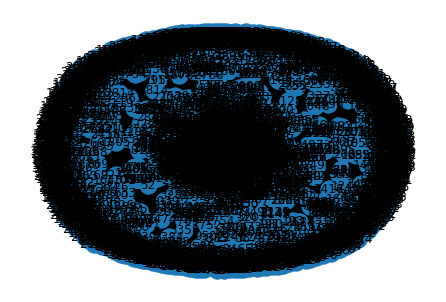

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g1.to_networkx(), with_labels=True)